# Loan Bank Eligibility Prediction


## Introduction
This project focuses on building a classification model to predict the credit eligibility of clients using a dataset from a bank. The goal is to create a scoring system that evaluates the likelihood of repayment and assists in minimizing risk while maximizing profit.

### Objectives:
- Perform exploratory data analysis and preprocessing.
- Train multiple machine learning models and optimize them using hyperparameter tuning.
- Evaluate model performance and export the best-performing model for future use.


## Phase 1: Theoretical Exploration


### Cross-validation and Hyperparameter Tuning
- **Cross-validation** is a technique for assessing how well a model will generalize to an independent dataset.
- **Hyperparameter tuning** optimizes model parameters to improve performance.
    - **GridSearchCV**: Exhaustive search over a grid of hyperparameters.
    - **RandomizedSearchCV**: Random sampling of hyperparameter combinations.


In [9]:
# Basic libraries
import pandas as pd
import numpy as np

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
import os
import matplotlib.pyplot as plt


## Phase 2: Data Exploration



1. **Loaded the Dataset**:
   - The loan dataset was read from the specified file location.

2. **Split the Data**:
   - The dataset was split into two parts:
     - **Training Data (80%)**: Used for building and training machine learning models.
     - **Testing Data (20%)**: Reserved for validating the model's performance.

3. **Saved the Splits**:
   - The training data was saved as `data_working.csv`.
   - The testing data was saved as `data_raw.csv`.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Correct file path
file_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\loan-data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Split the data
data_working, data_raw = train_test_split(data, test_size=0.2, random_state=42)

# Save the splits into two separate CSV files
data_working_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv'
data_raw_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_raw.csv'

data_working.to_csv(data_working_path, index=False)
data_raw.to_csv(data_raw_path, index=False)

print(f"Data saved:\nWorking Data: {data_working_path}\nRaw Data: {data_raw_path}")


Data saved:
Working Data: C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv
Raw Data: C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_raw.csv


### Load the csv and first observations

In [ ]:

# path to the working data CSV
working_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_working.csv'

# Load the working data
data_working = pd.read_csv(working_data_path)

# Explore the data
print("General Information:")
print(data_working.info())

print("\nMissing Values:")
print(data_working.isnull().sum())

print("\nDescriptive Statistics:")
print(data_working.describe())


General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            784 non-null    object 
 1   Gender             766 non-null    object 
 2   Married            781 non-null    object 
 3   Dependents         764 non-null    object 
 4   Education          784 non-null    object 
 5   Self_Employed      739 non-null    object 
 6   ApplicantIncome    784 non-null    int64  
 7   CoapplicantIncome  784 non-null    float64
 8   LoanAmount         761 non-null    float64
 9   Loan_Amount_Term   769 non-null    float64
 10  Credit_History     726 non-null    float64
 11  Property_Area      784 non-null    object 
 12  Loan_Status        489 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 79.8+ KB
None

Missing Values:
Loan_ID                0
Gender                18
Married            

# Dataset Observations 

## Dataset Overview
- **Total Rows:** 784
- **Total Columns:** 13
- **Data Types:**
  - **Numeric Columns (5):** `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`.
  - **Categorical Columns (8):** `Loan_ID`, `Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status`.
- **Target Variable:** `Loan_Status` (indicates loan approval).

---

## Key Observations

### Missing Values:
- `Gender`: 18 missing.
- `Married`: 3 missing.
- `Dependents`: 20 missing.
- `Self_Employed`: 45 missing.
- `LoanAmount`: 23 missing.
- `Loan_Amount_Term`: 15 missing.
- `Credit_History`: 58 missing.
- `Loan_Status` (Target Variable): 295 missing.

### Data Imbalance:
- **Categorical Features:**
  - `Credit_History`: Dominated by `1.0` values.
  - `Property_Area`: Needs further analysis to check for imbalance.
- **Target Variable:** `Loan_Status` has missing values, which will affect supervised learning.

### Column Details:
- **Numerical Columns:**
  - `ApplicantIncome`, `CoapplicantIncome`: No missing values but may require scaling.
  - `LoanAmount`: Contains 23 missing values and may have a skewed distribution.
  - `Loan_Amount_Term`: Contains 15 missing values.
  - `Credit_History`: Contains 58 missing values, mostly populated by `1.0`.
- **Categorical Columns:**
  - Features like `Gender`, `Married`, `Self_Employed`, and `Property_Area` have missing values that need imputation.
  - Encoding will be required for machine learning.

---

## Next Steps

1. **Handle Missing Values:**
   - Use appropriate imputation strategies for categorical and numerical columns.
   - Address missing values in `Loan_Status` (target variable) by either excluding rows or imputing based on patterns.

2. **Analyze Feature Distributions:**
   - Visualize distributions of numerical features (`ApplicantIncome`, `LoanAmount`, etc.) to identify skewness or outliers.
   - Check class distributions for categorical features to detect imbalances.

3. **Preprocessing:**
   - Normalize or standardize numerical columns to ensure consistent scaling.
   - Encode categorical columns to prepare for model training.
   - Consider feature engineering, such as creating new features (e.g., combining incomes).

4. **EDA Visualization:**
   - Visualize relationships between features and `Loan_Status` using plots.
   - Use bar plots to explore how categorical variables relate to `Loan_Status`.

5. **Train-Test Split:**
   - Ensure the dataset is cleaned and preprocessed before splitting into training and testing subsets.


In [8]:

# Check for unique values and missing values
unique_values = data_working.nunique()
low_unique_columns = unique_values[unique_values <= 1]
missing_percentage = (data_working.isnull().sum() / len(data_working)) * 100
high_missing_columns = missing_percentage[missing_percentage > 50]

# Display results
print("Columns with very low unique values:")
print(low_unique_columns)

print("\nColumns with high percentage of missing values:")
print(high_missing_columns)


Columns with very low unique values:
Series([], dtype: int64)

Columns with high percentage of missing values:
Series([], dtype: float64)


### Columns with Very Low Unique Values:

No columns have a single unique value or very low variability. This means all columns potentially contribute some variation to the dataset and might be relevant for analysis.
Columns with High Percentage of Missing Values:

No columns have more than 50% missing values. This suggests that all columns contain enough data to be included in the analysis with appropriate imputation for missing value

### Visualize missing values

C:\Users\khrib\AppData\Local\Temp\ipykernel_17080\3584083997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


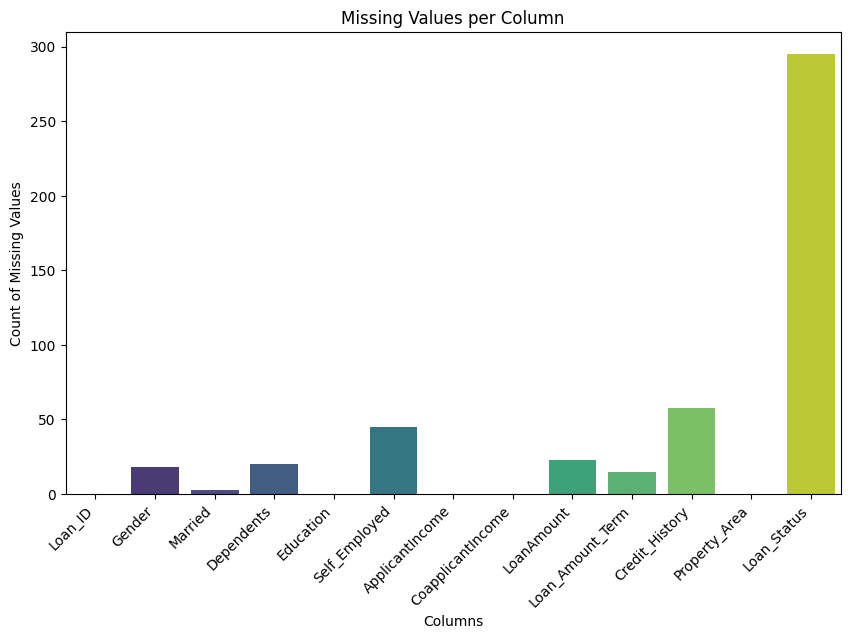

Missing Value Percentage:



(None,
 Loan_ID               0.000000
 Gender                2.295918
 Married               0.382653
 Dependents            2.551020
 Education             0.000000
 Self_Employed         5.739796
 ApplicantIncome       0.000000
 CoapplicantIncome     0.000000
 LoanAmount            2.933673
 Loan_Amount_Term      1.913265
 Credit_History        7.397959
 Property_Area         0.000000
 Loan_Status          37.627551
 dtype: float64)

In [10]:
plt.figure(figsize=(10, 6))
missing_values = data_working.isnull().sum()
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()

# Display missing value percentages
missing_percentage = (data_working.isnull().sum() / len(data_working)) * 100
print("Missing Value Percentage:\n"), missing_percentage

### Separate Numerical and Categorical Columns

In [11]:
# Separate categorical and numerical columns
categorical_columns = data_working.select_dtypes(include=['object']).columns
numerical_columns = data_working.select_dtypes(include=['int64', 'float64']).columns

# Display columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)


Categorical Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
Numerical Columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


### Explore Categorical Columns

In [12]:
print("Categorical Columns Exploration:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(data_working[col].value_counts(dropna=False))
    print(f"Missing Values: {data_working[col].isnull().sum()} ({(data_working[col].isnull().mean() * 100):.2f}%)")


Categorical Columns Exploration:

Column: Loan_ID
Loan_ID
LP002969    1
LP001945    1
LP001431    1
LP001637    1
LP001682    1
           ..
LP001027    1
LP002277    1
LP002868    1
LP001131    1
LP001350    1
Name: count, Length: 784, dtype: int64
Missing Values: 0 (0.00%)

Column: Gender
Gender
Male      622
Female    144
NaN        18
Name: count, dtype: int64
Missing Values: 18 (2.30%)

Column: Married
Married
Yes    509
No     272
NaN      3
Name: count, dtype: int64
Missing Values: 3 (0.38%)

Column: Dependents
Dependents
0      427
2      138
1      123
3+      76
NaN     20
Name: count, dtype: int64
Missing Values: 20 (2.55%)

Column: Education
Education
Graduate        613
Not Graduate    171
Name: count, dtype: int64
Missing Values: 0 (0.00%)

Column: Self_Employed
Self_Employed
No     645
Yes     94
NaN     45
Name: count, dtype: int64
Missing Values: 45 (5.74%)

Column: Property_Area
Property_Area
Urban        281
Semiurban    271
Rural        232
Name: count, dtype: int6

### Explore Numerical Columns

In [13]:
print("\nNumerical Columns Exploration:")
for col in numerical_columns:
    print(f"\nColumn: {col}")
    print(data_working[col].describe())
    print(f"Missing Values: {data_working[col].isnull().sum()} ({(data_working[col].isnull().mean() * 100):.2f}%)")



Numerical Columns Exploration:

Column: ApplicantIncome
count      784.000000
mean      5325.243622
std       6192.326967
min          0.000000
25%       2849.500000
50%       3810.000000
75%       5669.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64
Missing Values: 0 (0.00%)

Column: CoapplicantIncome
count      784.000000
mean      1619.170816
std       2939.614697
min          0.000000
25%          0.000000
50%       1012.000000
75%       2330.750000
max      41667.000000
Name: CoapplicantIncome, dtype: float64
Missing Values: 0 (0.00%)

Column: LoanAmount
count    761.000000
mean     144.060447
std       83.206301
min        9.000000
25%      100.000000
50%      125.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64
Missing Values: 23 (2.93%)

Column: Loan_Amount_Term
count    769.000000
mean     341.659298
std       66.728332
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Lo

### Visualization of Key Relationships

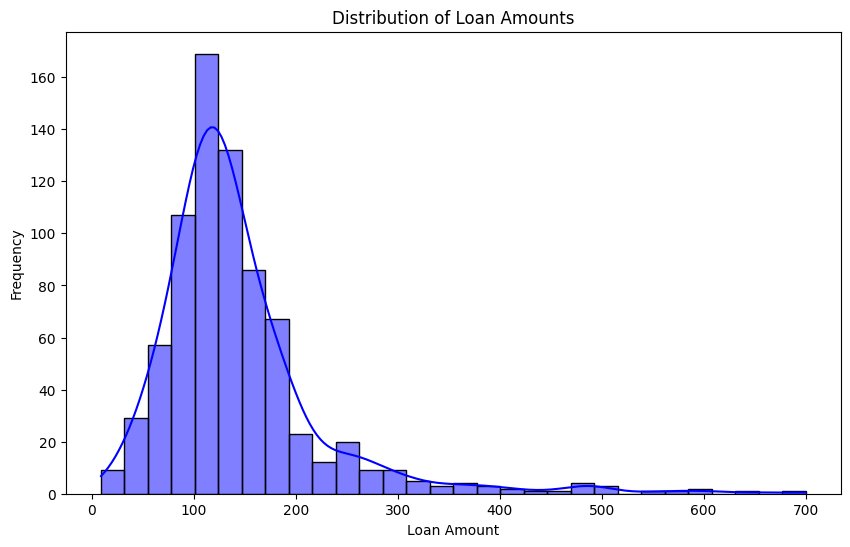

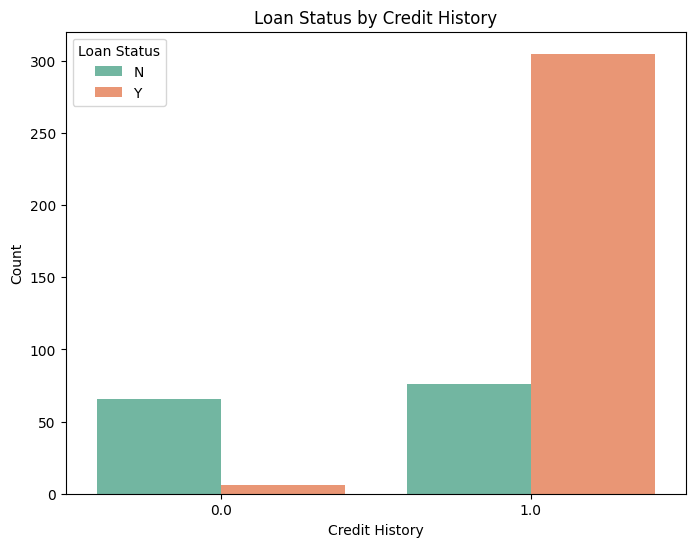

In [14]:
# Example: LoanAmount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_working['LoanAmount'], kde=True, bins=30, color="blue")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Example: Credit History vs Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x="Credit_History", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


 ### Categorical Variable Distributions

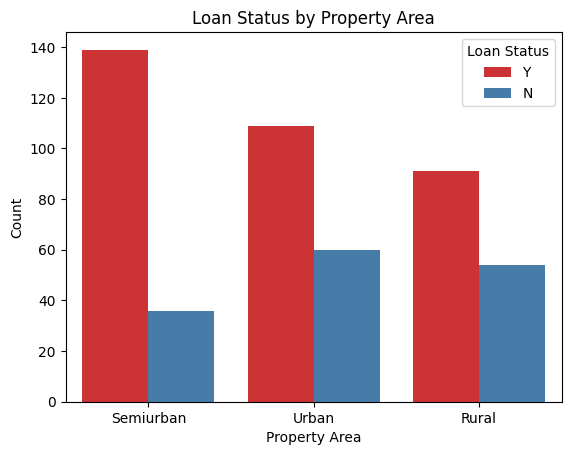

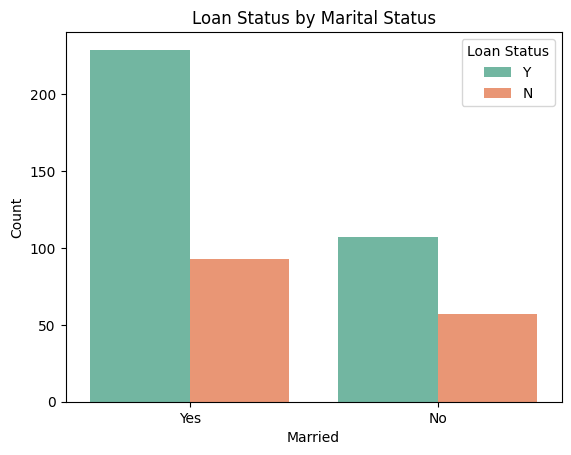

In [15]:
# Property Area vs Loan Status
sns.countplot(x="Property_Area", hue="Loan_Status", data=data_working, palette="Set1")
plt.title("Loan Status by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Married vs Loan Status
sns.countplot(x="Married", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


### Numerical Distributions

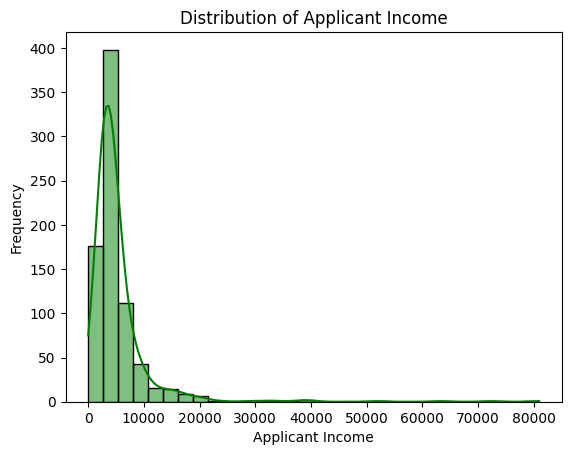

C:\Users\khrib\AppData\Local\Temp\ipykernel_17080\2102964183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Education", y="LoanAmount", data=data_working, palette="Set3")


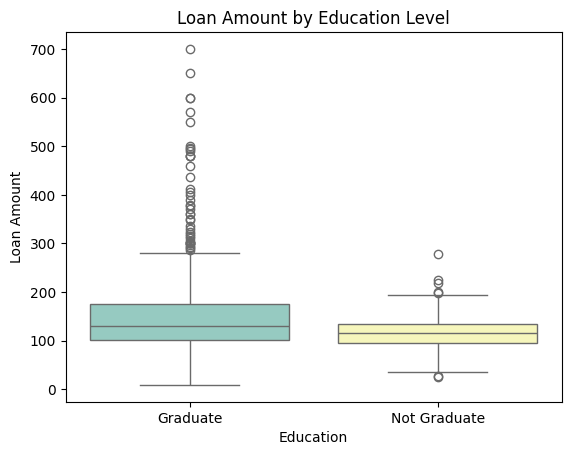

In [16]:
# Distribution of Applicant Income
sns.histplot(data_working['ApplicantIncome'], kde=True, bins=30, color="green")
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

# Loan Amount by Education
sns.boxplot(x="Education", y="LoanAmount", data=data_working, palette="Set3")
plt.title("Loan Amount by Education Level")
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.show()


### Target Variable Analysis

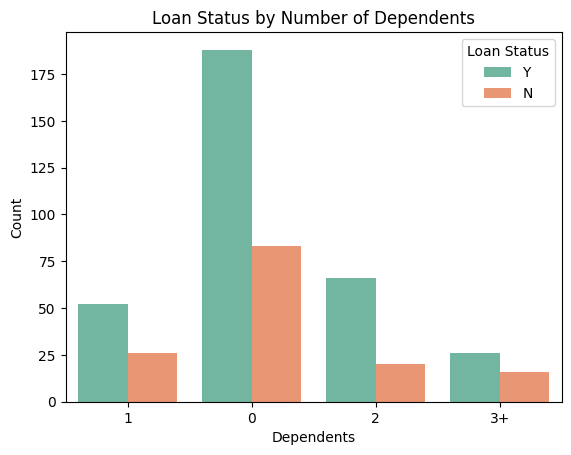

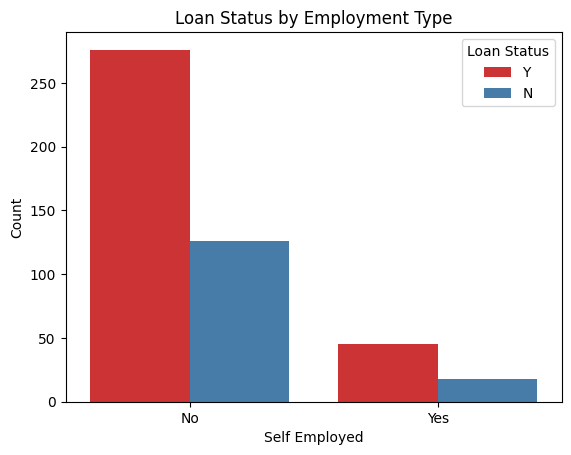

In [17]:
# Dependents vs Loan Status
sns.countplot(x="Dependents", hue="Loan_Status", data=data_working, palette="Set2")
plt.title("Loan Status by Number of Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()

# Self Employed vs Loan Status
sns.countplot(x="Self_Employed", hue="Loan_Status", data=data_working, palette="Set1")
plt.title("Loan Status by Employment Type")
plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.show()


### Observations after viz
#### From Categorical Columns
Loan_ID:

Unique for every entry, does not contribute to prediction. Recommendation: Drop this column.
Gender:

Some missing values (~2.3%).
Dominated by "Male". Recommendation: Impute missing values with the mode ("Male").
Married:

Missing values observed (~0.38%).
Strong impact on Loan_Status from the visualization. Recommendation: Impute with the mode ("Yes").
Dependents:

Missing values (~2.55%).
Loan approvals differ based on dependency levels. Recommendation: Impute missing values and analyze as an important feature.
Self_Employed:

Missing values (~5.73%).
Majority "No". Loan approvals vary between employed/self-employed. Recommendation: Impute with the mode ("No").
Property_Area:

Significant impact on Loan_Status. Recommendation: Keep as is, no missing values.
Loan_Status:

Target variable, but has missing values (~37.62%).
Recommendation: Handle missing values carefully. Missing rows may need removal since imputation might introduce bias.

#### From Numerical Columns

ApplicantIncome:

High variance, with outliers (maximum value is much higher than 75th percentile).
Skewed distribution. Recommendation: Normalize or apply log transformation.
CoapplicantIncome:

Many entries have 0.0. Potential cases of single applicants.
Skewed data. Recommendation: Combine with ApplicantIncome to create TotalIncome for better representation.
LoanAmount:

Missing values (~2.93%).
Outliers are present. Recommendation: Impute missing values using the median and apply scaling or log transformation.
Loan_Amount_Term:

Missing values (~1.91%).
Majority (~360 months). Recommendation: Impute missing values with the mode (360).
Credit_History:

Missing values (~7.40%).
Strong correlation with Loan_Status. Recommendation: Impute missing values with mode (1.0) as it strongly affects approvals.

### Steps to Take based on observations

#### 1. Data Cleaning

Drop Loan_ID: It does not provide predictive power.
Impute Missing Values:
Categorical Columns:
Gender: Mode.
Married: Mode.
Dependents: Mode.
Self_Employed: Mode.
Credit_History: Mode.
Numerical Columns:
LoanAmount: Median.
Loan_Amount_Term: Mode.

#### 2. Feature Engineering

Combine Income Columns:
Create TotalIncome = ApplicantIncome + CoapplicantIncome.
Transformations:
Apply log transformation to TotalIncome and LoanAmount to reduce skewness.

#### 3. Visualize Key Relationships

Explore:
Correlation heatmap to identify significant features.
Relationships between TotalIncome, LoanAmount, and Loan_Status.

#### 4. Prepare Data for Modeling

Normalize or standardize numerical features.
Encode categorical variables using one-hot encoding or label encoding.

#### 5. Handle Outliers

Use visualization (boxplots, histograms) to detect and address outliers in numerical features.


## Phase 3: Data Preprocessing

### Data Cleaning :involves dropping irrelevant columns and imputing missing values.

In [20]:

# Drop `Loan_ID` as it is not predictive
data_cleaned = data_working.drop(columns=['Loan_ID'])

# Impute missing values for categorical columns
categorical_imputations = {
    'Gender': data_cleaned['Gender'].mode()[0],
    'Married': data_cleaned['Married'].mode()[0],
    'Dependents': data_cleaned['Dependents'].mode()[0],
    'Self_Employed': data_cleaned['Self_Employed'].mode()[0],
    'Credit_History': data_cleaned['Credit_History'].mode()[0],
}
data_cleaned.fillna(value=categorical_imputations, inplace=True)

# Impute missing values for numerical columns
data_cleaned['LoanAmount'].fillna(data_cleaned['LoanAmount'].median(), inplace=True)
data_cleaned['Loan_Amount_Term'].fillna(data_cleaned['Loan_Amount_Term'].mode()[0], inplace=True)

# Display cleaned data summary
print("Data Cleaning Completed. Summary:")
print(data_cleaned.info())


Data Cleaning Completed. Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             784 non-null    object 
 1   Married            784 non-null    object 
 2   Dependents         784 non-null    object 
 3   Education          784 non-null    object 
 4   Self_Employed      784 non-null    object 
 5   ApplicantIncome    784 non-null    int64  
 6   CoapplicantIncome  784 non-null    float64
 7   LoanAmount         784 non-null    float64
 8   Loan_Amount_Term   784 non-null    float64
 9   Credit_History     784 non-null    float64
 10  Property_Area      784 non-null    object 
 11  Loan_Status        489 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 73.6+ KB
None


### Feature Engineering :Combine incomes and apply transformations to reduce skewness.

In [21]:

# Create `TotalIncome` as the sum of `ApplicantIncome` and `CoapplicantIncome`
data_cleaned['TotalIncome'] = data_cleaned['ApplicantIncome'] + data_cleaned['CoapplicantIncome']

# Apply log transformation to reduce skewness
import numpy as np
data_cleaned['Log_TotalIncome'] = np.log1p(data_cleaned['TotalIncome'])  # log1p to handle zeros safely
data_cleaned['Log_LoanAmount'] = np.log1p(data_cleaned['LoanAmount'])

# Display the transformed features
print(data_cleaned[['TotalIncome', 'Log_TotalIncome', 'Log_LoanAmount']].head())


   TotalIncome  Log_TotalIncome  Log_LoanAmount
0       4436.0         8.397734        4.605170
1       3701.0         8.216628        5.093750
2       4600.0         8.434029        4.219508
3       5167.0         8.550241        4.744932
4       3167.0         8.060856        4.317488


### Visualize Key Relationships

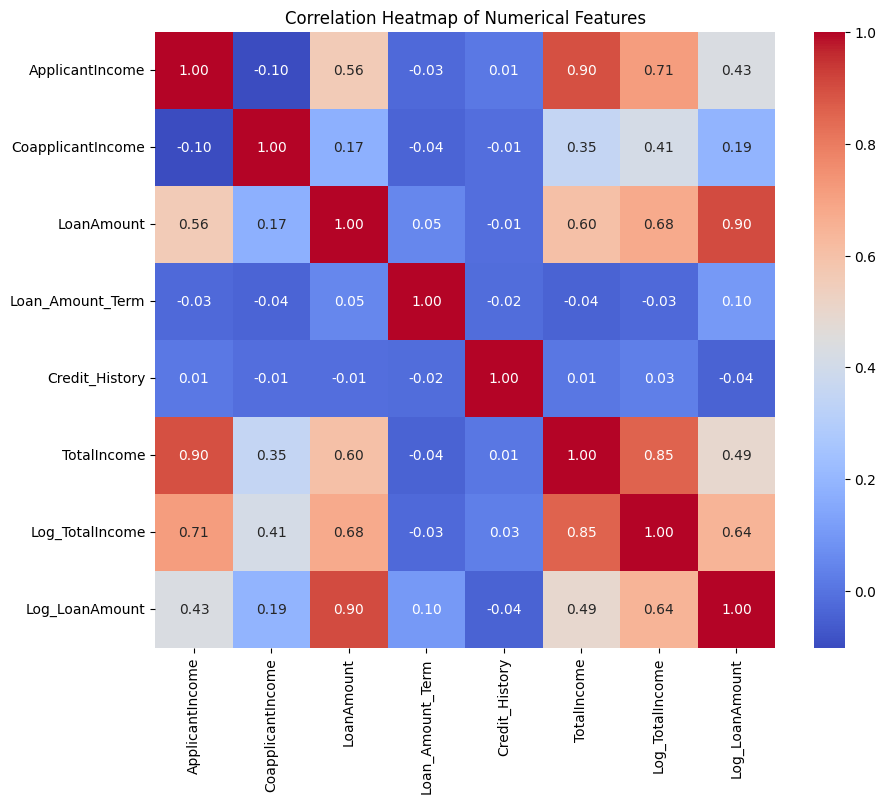

In [24]:
# Step 3: Visualize Key Relationships 
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the correlation matrix
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_cleaned[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



### Prepare Data for Modeling 
Normalize or standardize numerical features and encode categorical variables.

In [25]:
# Step 4: Prepare Data for Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
data_cleaned[['Normalized_TotalIncome', 'Normalized_LoanAmount']] = scaler.fit_transform(
    data_cleaned[['TotalIncome', 'LoanAmount']]
)

# Encode categorical variables using LabelEncoder
label_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in label_columns:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])

# Display the prepared data
print("Data Prepared for Modeling:")
print(data_cleaned.head())


Data Prepared for Modeling:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        1           1          0              0             2269   
1       1        1           1          0              0             2185   
2       1        1           0          1              0             1700   
3       1        1           0          0              0             3500   
4       1        0           0          0              0             3167   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             2167.0        99.0             360.0             1.0   
1             1516.0       162.0             360.0             1.0   
2             2900.0        67.0             360.0             0.0   
3             1667.0       114.0             360.0             1.0   
4                0.0        74.0             360.0             1.0   

   Property_Area  Loan_Status  TotalIncome  Log_TotalIncome  Log_LoanAmount  \
0        

### Step 5: Handle Outliers

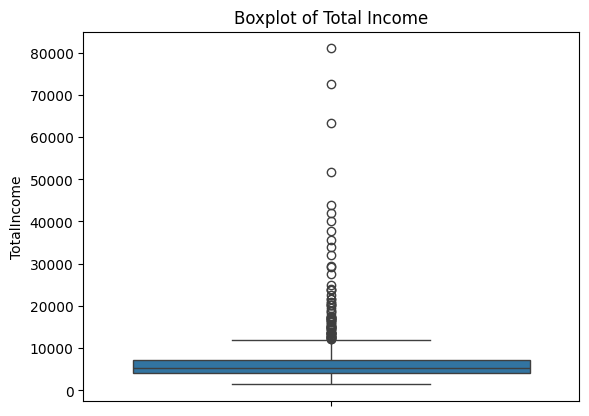

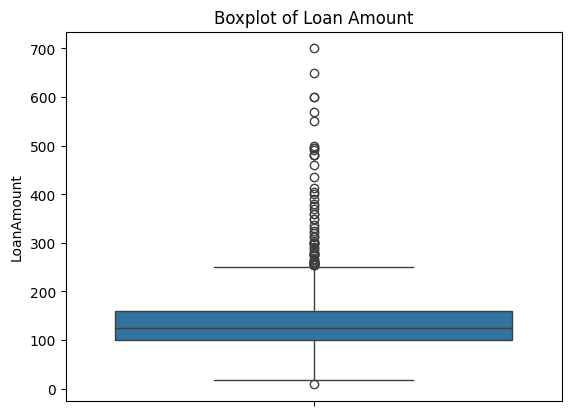

In [26]:

# Boxplot for TotalIncome
sns.boxplot(data_cleaned['TotalIncome'])
plt.title("Boxplot of Total Income")
plt.show()

# Boxplot for LoanAmount
sns.boxplot(data_cleaned['LoanAmount'])
plt.title("Boxplot of Loan Amount")
plt.show()

# Optionally remove or cap outliers based on thresholds
q1 = data_cleaned['TotalIncome'].quantile(0.25)
q3 = data_cleaned['TotalIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove or cap outliers
data_cleaned['TotalIncome'] = np.where(data_cleaned['TotalIncome'] > upper_bound, upper_bound,
                                       np.where(data_cleaned['TotalIncome'] < lower_bound, lower_bound,
                                                data_cleaned['TotalIncome']))

#### Final Preprocessing 
##### 1-Drop features that are redundant or not useful:
ApplicantIncome and CoapplicantIncome (replaced by TotalIncome).
LoanAmount (replaced by Log_LoanAmount).
##### 2. Normalize and Encode
Ensure all features are normalized or standardized.
Confirm all categorical features are encoded.

In [27]:
# Drop redundant features based on the correlation heat map
data_final = data_cleaned.drop(columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

# Final dataset preview
print("Final Features for Modeling:")
print(data_final.head())

# Save the preprocessed dataset for modeling
final_data_path = r'C:\data\simplon_dev_ia_projects\projet_notebooks\classification\data\data_preprocessed.csv'
data_final.to_csv(final_data_path, index=False)

print(f"Preprocessed data saved to: {final_data_path}")


Final Features for Modeling:
   Gender  Married  Dependents  Education  Self_Employed  Loan_Amount_Term  \
0       1        1           1          0              0             360.0   
1       1        1           1          0              0             360.0   
2       1        1           0          1              0             360.0   
3       1        1           0          0              0             360.0   
4       1        0           0          0              0             360.0   

   Credit_History  Property_Area  Loan_Status  TotalIncome  Log_TotalIncome  \
0             1.0              1            2       4436.0         8.397734   
1             1.0              1            2       3701.0         8.216628   
2             0.0              2            2       4600.0         8.434029   
3             1.0              1            1       5167.0         8.550241   
4             1.0              2            0       3167.0         8.060856   

   Log_LoanAmount  Normaliz

## Phase 4: Model Training

In [ ]:

# Placeholder for model training
# Example: Train Logistic Regression, Random Forest, etc.

# Use GridSearchCV/RandomizedSearchCV for hyperparameter tuning


## Phase 5: Model Evaluation

In [ ]:

# Placeholder for model evaluation
# Example: Evaluate accuracy, precision, recall, and F1-score
# Generate confusion matrix and visualize feature importance


## Phase 6: Exporting and Using the Model

In [ ]:

# Export the best-performing model
# Example: Save model using pickle
# Demonstrate loading and using the model for new predictions


## Conclusions


### Summary
- **Key Findings**: Insights from the analysis and model performance.
- **Challenges**: Issues encountered during the project and solutions applied.
- **Future Recommendations**: Steps to further improve the model or extend the project scope.


## References

Cite resources, papers, and documentation used in this project.